In [27]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
organ = "liver"
# organ = "heart"
# organ = "muscle"
# organ = "kidney"

Load data
===

In [29]:
path= '../data/alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    
# data=data[data.NDP >=4]
print(data.shape)

(27307, 31)


In [30]:
data_align=data
data_align.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,lowerci_old,upperci_old,sigma_old,lowerci_new,upperci_new,sigma_new,old_pearson,new_pearson,Protein,diff
0,1433B_MOUSE,NLLSVAYK,2,0.953825,0.973210,12,0.16249,0.013771,1.432731e+09,454.26599,...,0.140399,0.184581,0.010037,0.145470,0.179510,0.007733,0.990368,0.994301,1433B_MOUSE,0.019385
1,1433B_MOUSE,EMQPTHPIR,3,0.936609,0.980352,12,0.13397,0.011820,1.813278e+08,370.19043,...,0.111041,0.156899,0.010417,0.120541,0.147399,0.006102,0.981593,0.993457,1433B_MOUSE,0.043742
2,1433B_MOUSE,DSTLIMQLLR,2,0.985986,0.997529,12,0.19307,0.009791,1.747584e+09,595.33411,...,0.174313,0.211827,0.008522,0.185113,0.201027,0.003615,0.994336,0.999524,1433B_MOUSE,0.011544
3,1433B_MOUSE,YLSEVASGENK,2,0.986787,0.996046,12,0.23813,0.011572,1.513652e+08,598.79327,...,0.211593,0.264667,0.012057,0.223234,0.253026,0.006768,0.997019,0.998608,1433B_MOUSE,0.009259
4,1433B_MOUSE,DSTLImQLLR,2,-0.132288,0.291445,12,0.10303,0.026401,4.965206e+07,603.33154,...,0.039029,0.167031,0.029078,0.045577,0.160483,0.026103,0.743668,0.830570,1433B_MOUSE,0.423734


In [31]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0]/data.shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0]/data.shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0]/data.shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0]/data.shape[0])


Rsquared >= 95 	 Original d2ome = 0.2519866700845937
Rsquared >= 90 	 Original d2ome = 0.3805617607206943
Rsquared >= 80 	 Original d2ome = 0.5016296187790676
Rsquared >= 75 	 Original d2ome = 0.5383967480865712


In [32]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 6881
Rsquared >= 90 	 Original d2ome = 10392
Rsquared >= 80 	 Original d2ome = 13698
Rsquared >= 75 	 Original d2ome = 14702
Rsquared <= 75 	 Original d2ome = 12423


In [33]:
alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

In [34]:
filelist

['1433B_MOUSE.csv',
 '1433E_MOUSE.csv',
 '1433F_MOUSE.csv',
 '1433G_MOUSE.csv',
 '1433T_MOUSE.csv',
 '1433Z_MOUSE.csv',
 '2A5A_MOUSE.csv',
 '2A5E_MOUSE.csv',
 '2AAA_MOUSE.csv',
 '2AAB_MOUSE.csv',
 '2ABA_MOUSE.csv',
 '2ABB_MOUSE.csv',
 '3BHS3_MOUSE.csv',
 '3BHS5_MOUSE.csv',
 '3BHS7_MOUSE.csv',
 '3HAO_MOUSE.csv',
 '3HIDH_MOUSE.csv',
 '4EBP2_MOUSE.csv',
 '6PGD_MOUSE.csv',
 '6PGL_MOUSE.csv',
 'A16A1_MOUSE.csv',
 'A1AG1_MOUSE.csv',
 'A1AG2_MOUSE.csv',
 'A1AT1_MOUSE.csv',
 'A1AT2_MOUSE.csv',
 'A1AT3_MOUSE.csv',
 'A1AT4_MOUSE.csv',
 'A1AT5_MOUSE.csv',
 'A1CF_MOUSE.csv',
 'A2AP_MOUSE.csv',
 'AAAD_MOUSE.csv',
 'AACS_MOUSE.csv',
 'AADAT_MOUSE.csv',
 'AAKB1_MOUSE.csv',
 'AAKG1_MOUSE.csv',
 'AAPK1_MOUSE.csv',
 'AAPK2_MOUSE.csv',
 'AASD1_MOUSE.csv',
 'AASS_MOUSE.csv',
 'AATC_MOUSE.csv',
 'AATM_MOUSE.csv',
 'ABC8B_MOUSE.csv',
 'ABCA6_MOUSE.csv',
 'ABCB6_MOUSE.csv',
 'ABCB7_MOUSE.csv',
 'ABCBA_MOUSE.csv',
 'ABCBB_MOUSE.csv',
 'ABCD3_MOUSE.csv',
 'ABCE1_MOUSE.csv',
 'ABCF1_MOUSE.csv',
 'ABCF2_MOUSE.cs

In [35]:
path= '../data/no_alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    
# data=data[data.NDP >=4]
print(data.shape)

(27307, 31)


In [36]:
data_noalign=data
data_noalign.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,lowerci_old,upperci_old,sigma_old,lowerci_new,upperci_new,sigma_new,old_pearson,new_pearson,Protein,diff
0,1433B_MOUSE,NLLSVAYK,2,0.967023,0.982095,7,0.16249,0.015089,1.432731e+09,454.26599,...,0.126805,0.198175,0.014584,0.136035,0.188945,0.010812,0.993085,0.995694,1433B_MOUSE,0.015072
1,1433B_MOUSE,EMQPTHPIR,3,0.976155,0.993823,6,0.13397,0.011496,1.813278e+08,370.19043,...,0.099607,0.168333,0.013368,0.115684,0.152256,0.007114,0.993588,0.998221,1433B_MOUSE,0.017668
2,1433B_MOUSE,DSTLIMQLLR,2,0.985986,0.997529,12,0.19307,0.009791,1.747584e+09,595.33411,...,0.174313,0.211827,0.008522,0.185113,0.201027,0.003615,0.994336,0.999524,1433B_MOUSE,0.011544
3,1433B_MOUSE,YLSEVASGENK,2,0.986787,0.996046,12,0.23813,0.011572,1.513652e+08,598.79327,...,0.211593,0.264667,0.012057,0.223234,0.253026,0.006768,0.997019,0.998608,1433B_MOUSE,0.009259
4,1433B_MOUSE,DSTLImQLLR,2,-0.132288,0.291445,12,0.10303,0.026401,4.965206e+07,603.33154,...,0.039029,0.167031,0.029078,0.045577,0.160483,0.026103,0.743668,0.830570,1433B_MOUSE,0.423734


In [37]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 7042
Rsquared >= 90 	 Original d2ome = 10407
Rsquared >= 80 	 Original d2ome = 13568
Rsquared >= 75 	 Original d2ome = 14481
Rsquared <= 75 	 Original d2ome = 12376


In [38]:
no_alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

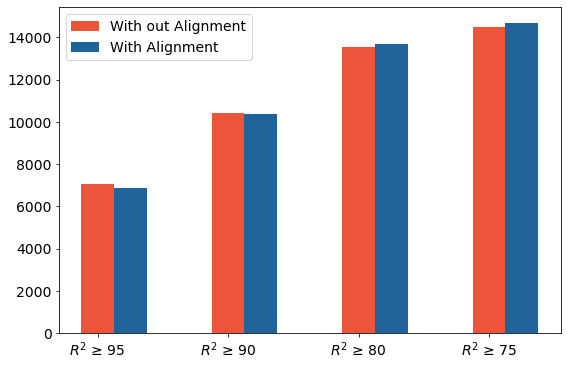

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6))
bar_width = 0.25
index=np.array([0,1,2,3])

# '#3CAEA3','#F6D55C','#ED553B','#20639b'

plt.bar(index,no_alignmentdata[:-1],bar_width, label= "With out Alignment" ,color='#ED553B') #ED553B
# plt.bar(index+bar_width,noAlin,bar_width, label= "With Zero Ionscore",color='#F6D55C')
plt.bar(index+bar_width,alignmentdata[:-1],bar_width, label="With Alignment",color='#20639b')

plt.xticks([0,1,2,3],[r'$R^2$ ≥ 95',r'$R^2$ ≥ 90',r'$R^2$ ≥ 80',r'$R^2$ ≥ 75'])
plt.legend()

# plt.savefig(f"{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [40]:
# data_align.columns

In [41]:
# temp_merge

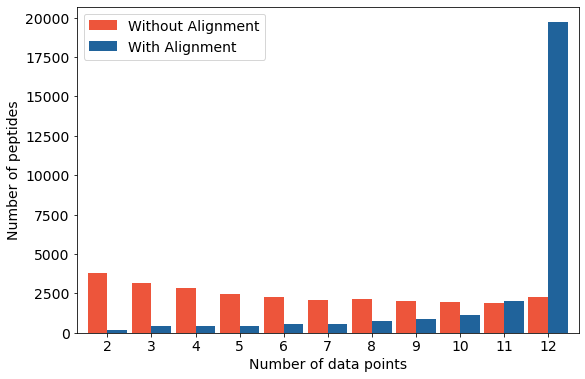

In [42]:
temp_align=data_align.groupby("NDP")["peptideSeq"].count().reset_index()
temp_noalign=data_noalign.groupby("NDP")["peptideSeq"].count()

temp_merge=temp_align.merge(temp_noalign,on="NDP")
temp_merge.NDP=temp_merge.NDP.astype(int)
temp_merge.set_index("NDP")
temp_merge=temp_merge[temp_merge.NDP>=2]
temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
temp_merge.columns=["With Alignment","Without Alignment"]
# ======================= Plot =======================
plt.rc('font', size=14) 
temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
                                                        color=["#ED553B","#20639b"])
plt.ylabel("Number of peptides")
plt.xlabel("Number of data points")

plt.savefig(f"NDP_{organ}_all.jpeg",dpi=900, bbox_inches = "tight")

In [43]:
# temp_align=data_align[data_align.old_Rsquared>=0.75].groupby("NDP")["peptideSeq"].count().reset_index()
# temp_noalign=data_noalign[data_noalign.old_Rsquared>=0.75].groupby("NDP")["peptideSeq"].count()
# temp_merge=temp_align.merge(temp_noalign,on="NDP")
# temp_merge.NDP=temp_merge.NDP.astype(int)
# temp_merge.set_index("NDP")
# temp_merge=temp_merge[temp_merge.NDP>=2]
# temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
# temp_merge.columns=["With Alignment","Without Alignment"]

# # ====================================================
# # ======================= Plot =======================
# wa=int(temp_merge[["With Alignment"]].sum())
# woa=int(temp_merge[["Without Alignment"]].sum())

# plt.rc('font', size=14) 
# g=temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
#                                                         color=["#ED553B","#20639b"])
# plt.ylabel("Number of peptides")
# plt.xlabel("Number of data points")
# plt.title(f"Without Alignment = {woa}, With Alignment = {wa}")
# g.set_xticklabels(range(2,13))
# # plt.savefig(f"NDP_liver.jpeg",dpi=900, bbox_inches = "tight")

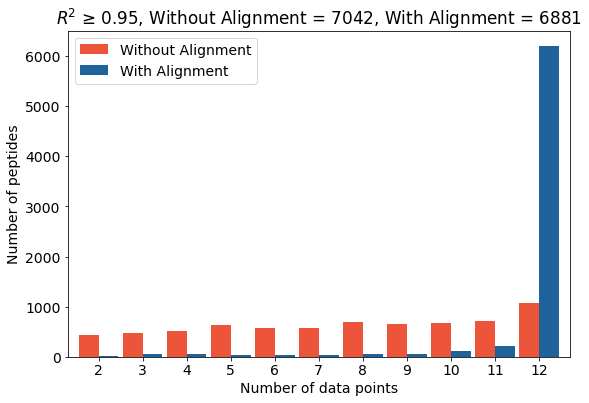

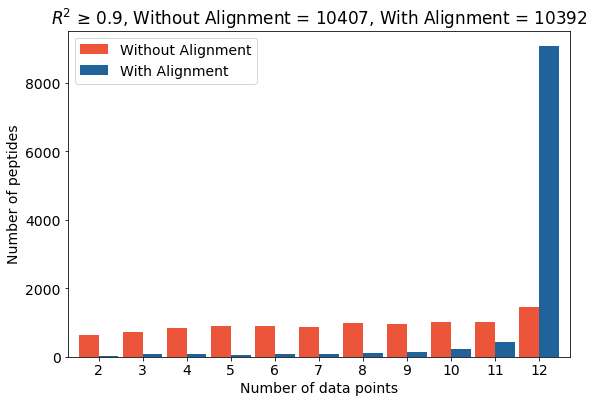

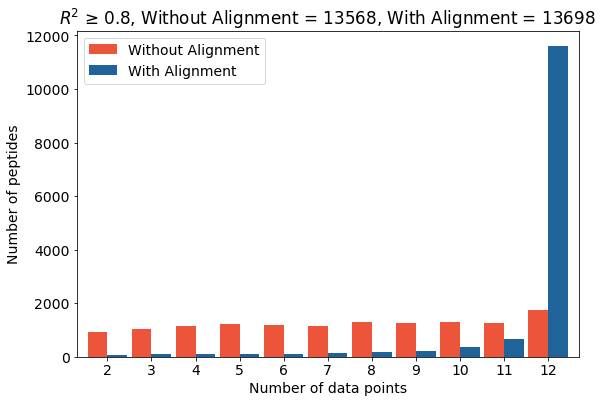

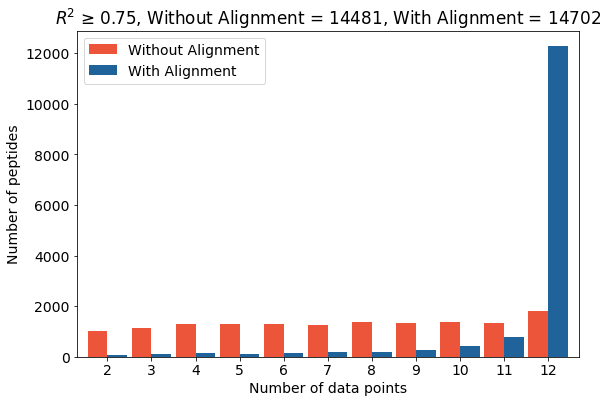

In [44]:
rsq=[0.95,0.9,0.8,0.75]

for r in rsq:
    temp_align=data_align[data_align.old_Rsquared>=r].groupby("NDP")["peptideSeq"].count().reset_index()
    temp_noalign=data_noalign[data_noalign.old_Rsquared>=r].groupby("NDP")["peptideSeq"].count()
    temp_merge=temp_align.merge(temp_noalign,on="NDP")
    temp_merge.NDP=temp_merge.NDP.astype(int)
    temp_merge.set_index("NDP")
    temp_merge=temp_merge[temp_merge.NDP>=2]
    temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
    temp_merge.columns=["With Alignment","Without Alignment"]

    # ====================================================
    # ======================= Plot =======================
    wa=int(temp_merge[["With Alignment"]].sum())
    woa=int(temp_merge[["Without Alignment"]].sum())
    
    plt.rc('font', size=14) 
    g=temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
                                                            color=["#ED553B","#20639b"])
    plt.ylabel("Number of peptides")
    plt.xlabel("Number of data points")
    plt.title("$R{^2}$"+f" ≥ {r}, Without Alignment = {woa}, With Alignment = {wa}")
    g.set_xticklabels(range(2,13))

    plt.savefig(f"NDP_{organ}_{r}.jpeg",dpi=900, bbox_inches = "tight")

In [45]:
# print(temp_merge[["With Alignment"]].sum())
# print(temp_merge[["Without Alignment"]].sum())

In [46]:
data_align.shape

(27307, 31)

In [47]:
data_noalign.shape

(27307, 31)

In [48]:
data_align[data_align.NDP>=4].sigma_old.describe()

count    26453.000000
mean         0.084001
std          0.277272
min          0.000264
25%          0.009699
50%          0.018186
75%          0.041326
max          9.250002
Name: sigma_old, dtype: float64

In [49]:
data_noalign[data_noalign.NDP>=4].sigma_old.describe()

count    1.988500e+04
mean     1.132022e+02
std      1.554711e+04
min      2.636674e-04
25%      1.135583e-02
50%      2.225005e-02
75%      4.933474e-02
max      2.191635e+06
Name: sigma_old, dtype: float64

In [50]:
# import seaborn as sns
# sns.distplot(data_noalign[(data_noalign.NDP>=4) & (data_noalign.sigma_old < 1)].sigma_old.astype(float) , 
#               hist=False, kde=True, bins=5000, 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

# sns.distplot(data_align[(data_align.NDP>=4) & (data_align.sigma_old < 1)].sigma_old.astype(float) , 
#               hist=False, kde=True, bins=5000, 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

In [51]:
# data_noalign[data_noalign.sigma_old<0]
np.std(data_noalign[data_noalign.NDP>=4].sigma_old)

15546.718893550382